<a href="https://colab.research.google.com/github/S10955004/bigdata/blob/main/0518_%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(SportsAnalytics)
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1920)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -70.8163              0.5357  



Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1920)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           23.63957             -0.02072              1.34615  
         PositionPF           PositionPG           PositionSF  
          -21.34247            -52.67148            -39.72243  
         PositionSG  
          -50.92796  

Degrees of Freedom: 528 Total (i.e. Null);  522 Residual
Null Deviance:	    96030000 
Residual Deviance: 1809000 	AIC: 5822

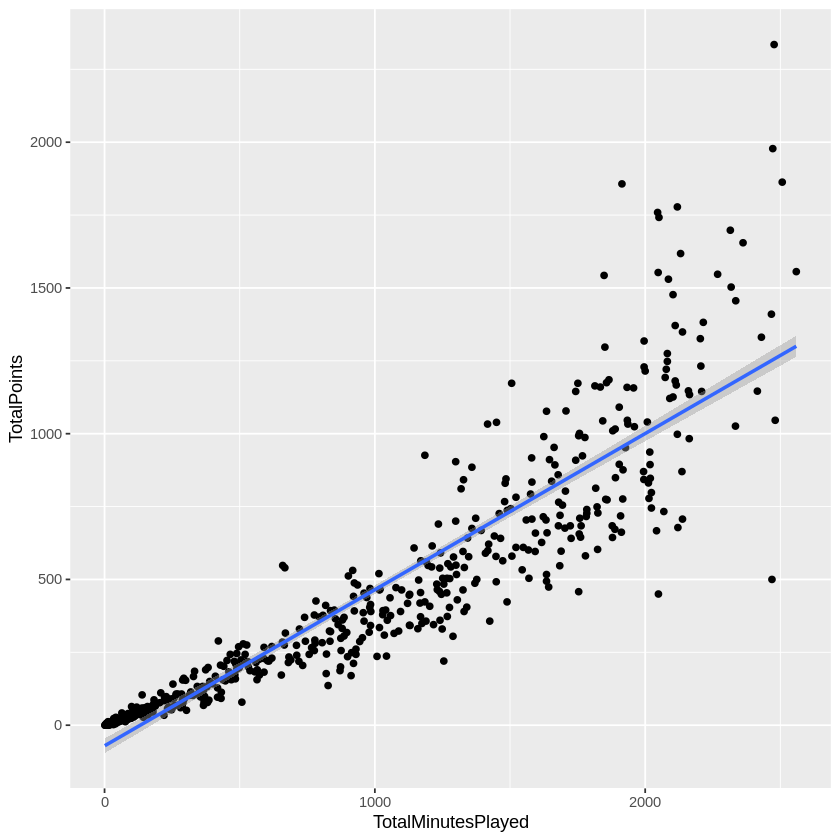

In [14]:
NBA1920<-fetch_NBAPlayerStatistics("19-20")
ggplot(NBA1920,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")
lm(TotalPoints~TotalMinutesPlayed,data=NBA1920)
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1920)

In [15]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [16]:
mydata$rank<-factor(mydata$rank)
mylogit<-glm(admit~gre+gpa+rank,data=mydata,family="binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [17]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(rpart)

In [19]:
DT<-rpart(Position~Blocks+ThreesMade+Assists,Steals,data=NBA1920)
DT

n= 529 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 529 12053 PG (0.13 0.17 0.26 0.23 0.21)  
    2) Assists< 217 461  8293 SF (0.16 0.21 0.12 0.29 0.22)  
      4) Blocks>=36.5 74  1835 C (0.44 0.29 0 0.27 0)  
        8) ThreesMade< 22.5 32   150 C (0.86 0.14 0 0 0) *
        9) ThreesMade>=22.5 42  1292 SF (0.22 0.37 0 0.41 0)  
         18) Assists>=112.5 16   358 PF (0.2 0.6 0 0.2 0) *
         19) Assists< 112.5 26   567 SF (0.24 0.2 0 0.55 0) *
      5) Blocks< 36.5 387  5800 SG (0.058 0.18 0.17 0.29 0.31)  
       10) ThreesMade< 39.5 246  1835 SF (0.092 0.19 0.25 0.34 0.13)  
         20) Assists>=107.5 10    92 PG (0 0.23 0.77 0 0) *
         21) Assists< 107.5 236  1440 SF (0.11 0.19 0.16 0.39 0.15)  
           42) ThreesMade< 6.5 140   421 PF (0.27 0.36 0.074 0.17 0.13) *
           43) ThreesMade>=6.5 96   890 SF (0.046 0.12 0.19 0.48 0.16) *
       11) ThreesMade>=39.5 141  3386 SG (0.041 0.17 0.13 0.27 0.39)  
         22) Assists< 86.

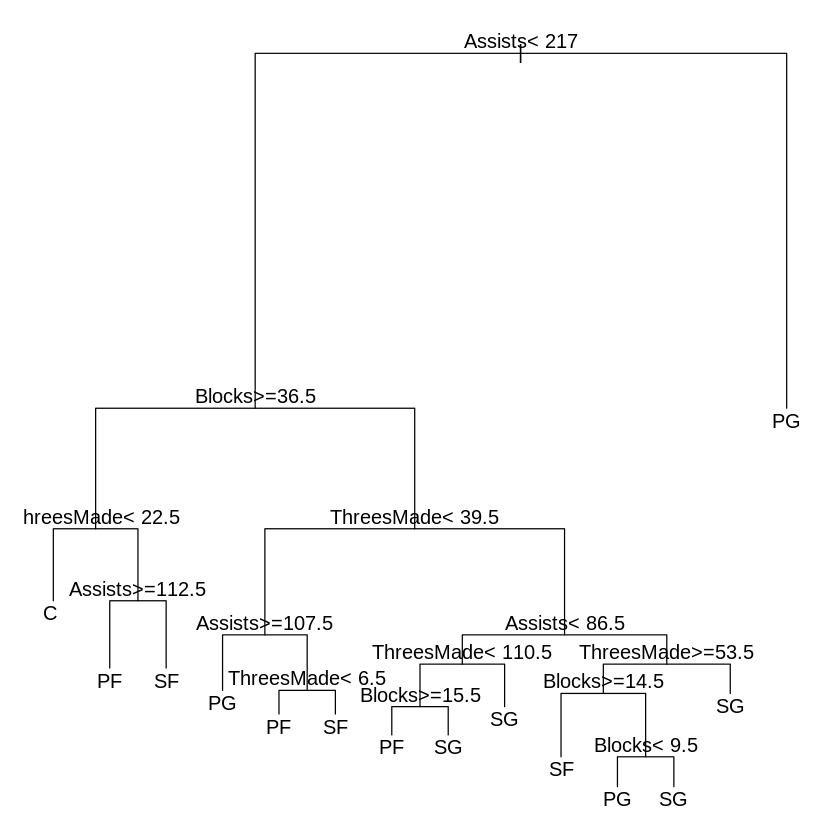

In [20]:
par(mfrow=c(1,1),mar=rep(1,4))
plot(DT)
text(DT,use.n=F,cex=1)

In [21]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



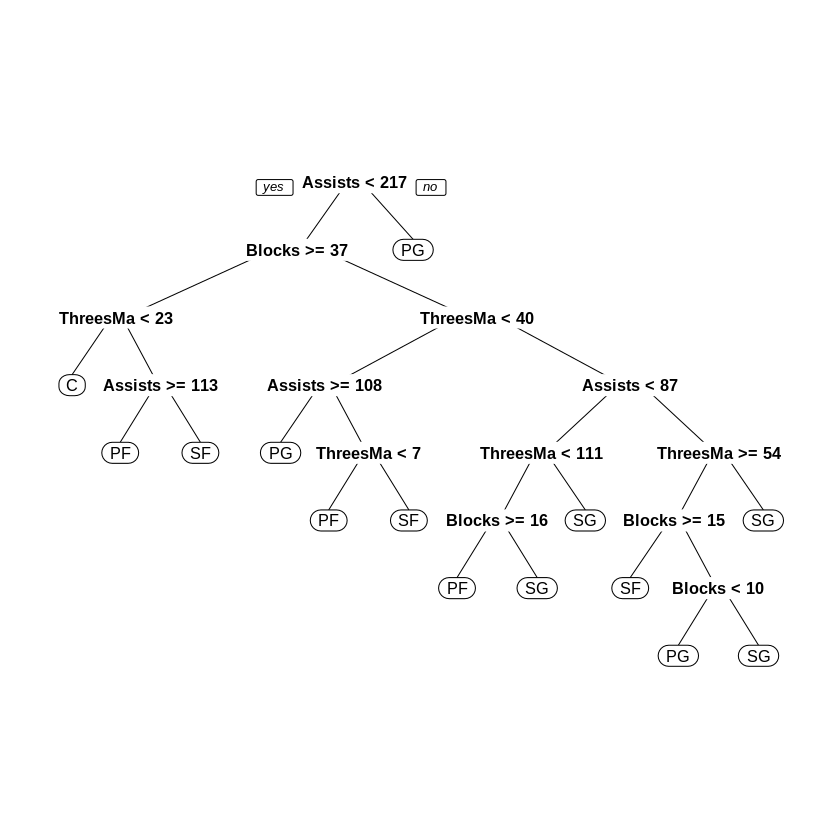

In [22]:
prp(DT)

In [23]:
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
install.packages("datasets")
library(datasets)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [ ]:
data(Groceries)
Groceries@data@Dim

[1]  169 9835

In [ ]:
rules<-apriori(Groceries,parameter=list(supp=0.001,conf=0.8),control=list(verbose=F))

In [ ]:
options(digits=2)

In [ ]:
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [ ]:
rules<-sort(rules,by="confidence",decreaseing=TRUE)
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="whole milk"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="sugar"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                          rhs     support confidence coverage lift count
[1] {flour,baking powder}     => {sugar} 0.0010  0.56       0.0018   16   10   
[2] {flour,margarine}         => {sugar} 0.0016  0.43       0.0038   13   16   
[3] {flour,soda}              => {sugar} 0.0011  0.39       0.0028   12   11   
[4] {margarine,baking powder} => {sugar} 0.0011  0.37       0.0031   11   11   
[5] {curd,flour}              => {sugar} 0.0011  0.35       0.0032   10   11   


In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="bottled beer"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {soda,liquor}           => {bottled beer} 0.0012  0.57       0.0021    7.1
[3] {liquor}                => {bottled beer} 0.0047  0.42       0.0111    5.2
[4] {herbs,bottled water}   => {bottled beer} 0.0012  0.40       0.0031    5.0
[5] {whole milk,soups}      => {bottled beer} 0.0011  0.38       0.0029    4.7
    count
[1] 19   
[2] 12   
[3] 46   
[4] 12   
[5] 11   


In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="whole milk"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="yogurt"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs         rhs                support confidence coverage lift count
[1] {yogurt} => {whole milk}       0.056   0.40       0.14     1.6  551  
[2] {yogurt} => {other vegetables} 0.043   0.31       0.14     1.6  427  
[3] {yogurt} => {rolls/buns}       0.034   0.25       0.14     1.3  338  
[4] {yogurt} => {tropical fruit}   0.029   0.21       0.14     2.0  288  
[5] {yogurt} => {soda}             0.027   0.20       0.14     1.1  269  


In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="rice"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs       rhs                     support confidence coverage lift count
[1] {rice} => {whole milk}            0.0047  0.61       0.0076   2.4  46   
[2] {rice} => {other vegetables}      0.0040  0.52       0.0076   2.7  39   
[3] {rice} => {root vegetables}       0.0032  0.41       0.0076   3.8  31   
[4] {rice} => {yogurt}                0.0023  0.31       0.0076   2.2  23   
[5] {rice} => {fruit/vegetable juice} 0.0019  0.25       0.0076   3.5  19   


In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="bottled beer"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  
